In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn import metrics
import cv2
import gc
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import warnings
warnings.filterwarnings('ignore')

In [22]:
from zipfile import ZipFile
data_path = 'C:/Users/Lenovo/Downloads/lung_colon_image_set (1).zip'
with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')

The data set has been extracted.


In [23]:
path = 'C:/Users/Lenovo/Downloads/archive (4)/lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)
classes

['lung_aca', 'lung_n', 'lung_scc']

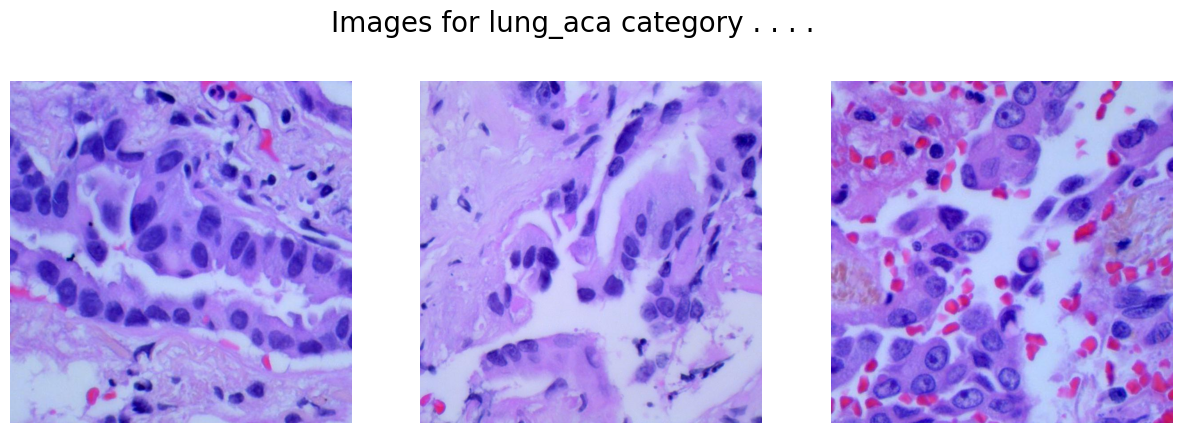

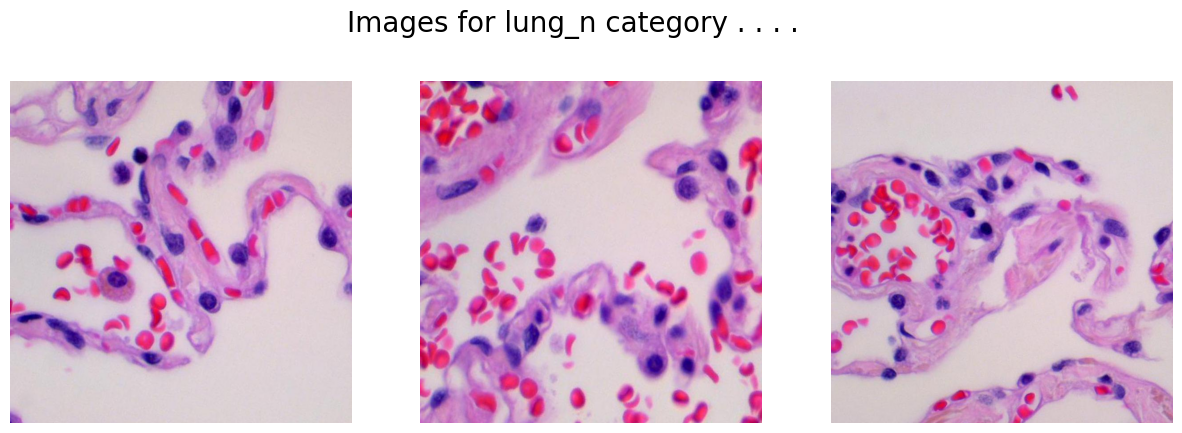

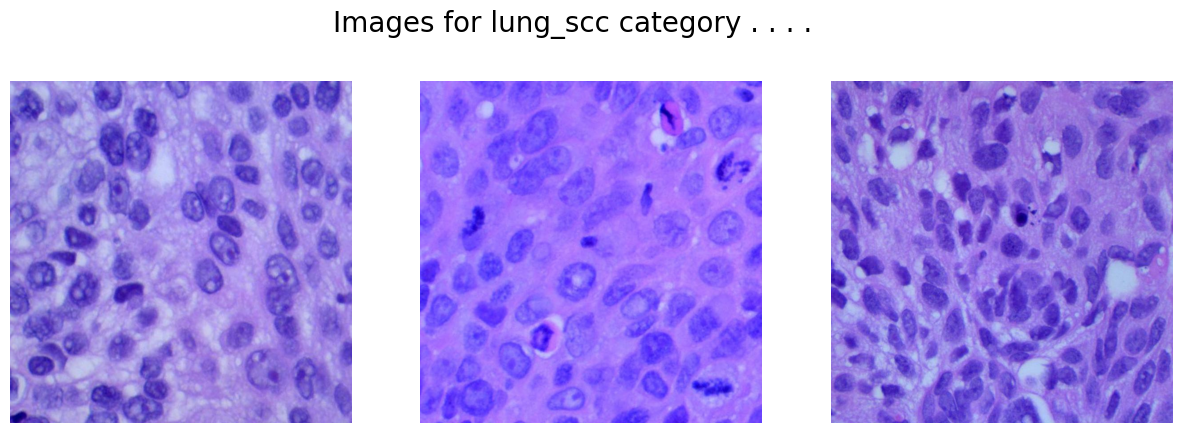

In [24]:
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

In [25]:
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64

In [26]:
X = []
Y = []

for i, cat in enumerate(classes):
  images = glob(f'{path}/{cat}/*.jpeg')

  for image in images:
    img = cv2.imread(image)
    X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
    Y.append(i)
    

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values

In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(X, one_hot_encoded_Y, test_size = SPLIT, random_state = 2022)
print(X_train.shape, X_val.shape)

(12000, 256, 256, 3) (3000, 256, 256, 3)


In [28]:
model = keras.models.Sequential([
    layers.Conv2D(filters=32,
                  kernel_size=(5, 5),
                  activation='relu',
                  input_shape=(IMG_SIZE,
                               IMG_SIZE,
                               3),
                  padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(filters=128,
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,684,291 (128.50 MB)

 Trainable params: 33,683,523 (128.49 MB)

 Non-trainable params: 768 (3.00 KB)

In [30]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [31]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.90:
            print('\n Validation accuracy has reached upto \
                      90% so, stopping further training.')
            self.model.stop_training = True
 
 
es = EarlyStopping(patience=3,
                   monitor='val_accuracy',
                   restore_best_weights=True)
 
lr = ReduceLROnPlateau(monitor='val_loss',
                       patience=2,
                       factor=0.5,
                       verbose=1)

In [32]:
history = model.fit(X_train, Y_train,
                    validation_data = (X_val, Y_val),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [es, lr, myCallback()])

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 654s 3s/step - accuracy: 0.8058 - loss: 0.4639 - val_accuracy: 0.3257 - val_loss: 45.7807 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 546s 3s/step - accuracy: 0.9173 - loss: 0.2169 - val_accuracy: 0.3253 - val_loss: 6.2646 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 535s 3s/step - accuracy: 0.9280 - loss: 0.1745 - val_accuracy: 0.8217 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.9442 - loss: 0.1385 - val_accuracy: 0.3733 - val_loss: 18.4383 - learning_rate: 0.0010
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9596 - loss: 0.1115
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 ━━━━━━━━━━━━━━━━━━━━ 525s 3s/step - accuracy: 0.9596 - loss: 0.1115 - val_accuracy: 0.5440 - val_loss: 2.8245 - learning_rate: 0.0010
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9721 - loss: 0.077

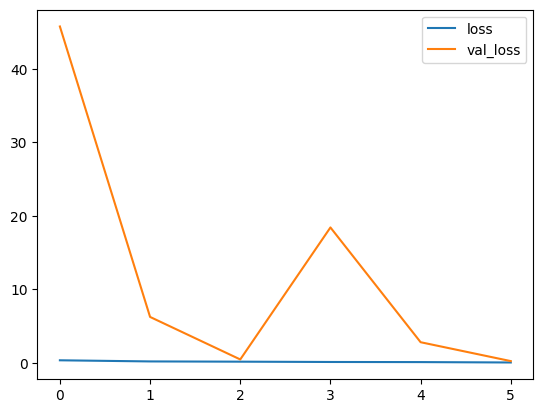

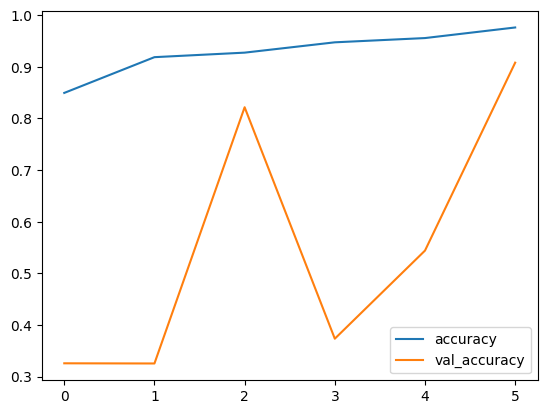

In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [34]:
Y_pred = model.predict(X_val)
Y_val = np.argmax(Y_val, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 272ms/step


In [18]:
metrics.confusion_matrix(Y_val, Y_pred)

array([[   0,    0,  987],
       [   5,  857,  115],
       [   0,    0, 1036]], dtype=int64)

In [35]:
print(metrics.classification_report(Y_val, Y_pred, target_names=classes))

              precision    recall  f1-score   support

    lung_aca       0.87      0.85      0.86       987
      lung_n       0.99      0.95      0.97       977
    lung_scc       0.87      0.92      0.90      1036

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



# Inception V3 

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define batch size and epochs
batch_size = 32
epochs = 10

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Check the directory structure and paths
train_dir = 'C:/Users/Lenovo/OneDrive/Desktop/New folder train'
validation_dir = 'C:/Users/Lenovo/OneDrive/Desktop/New folder test'

# Create the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

# Print the class indices to verify the number of classes
print("Training classes:", train_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)

# Set the number of classes based on the detected classes
num_classes = len(train_generator.class_indices)

# Define the function to create the model
def InceptionV3_model(num_classes):
    base_model = InceptionV3(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Instantiate the model with the correct number of classes
inceptionv3 = InceptionV3_model(num_classes)

# Training the model
inceptionv3.fit(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size
)


Found 9000 images belonging to 3 classes.
Found 6000 images belonging to 3 classes.
Training classes: {'lung_adcar_train': 0, 'n_train': 1, 'sqa_train': 2}
Validation classes: {'lung_adcar_test': 0, 'n_test': 1, 'sqa_test': 2}
Epoch 1/10


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8064 - loss: 0.4727 - val_accuracy: 0.9050 - val_loss: 0.2864
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9144 - loss: 0.2296 - val_accuracy: 0.9200 - val_loss: 0.2269
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9281 - loss: 0.1835 - val_accuracy: 0.9362 - val_loss: 0.1710
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9479 - loss: 0.1378 - val_accuracy: 0.8800 - val_loss: 0.3364
Epoch 5/10
34/62 ━━━━━━━━━━━━━━━━━━━━ 18s 650ms/step - accuracy: 0.9334 - loss: 0.2107

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 619ms/step - accuracy: 0.9398 - loss: 0.1869 - val_accuracy: 0.9400 - val_loss: 0.1992
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9626 - loss: 0.1044 - val_accuracy: 0.9438 - val_loss: 0.1402
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9493 - loss: 0.1294 - val_accuracy: 0.9038 - val_loss: 0.2622
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 51s 829ms/step - accuracy: 0.9258 - loss: 0.2199 - val_accuracy: 0.9300 - val_loss: 0.1896
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 918ms/step - accuracy: 0.9552 - loss: 0.1072 - val_accuracy: 0.9588 - val_loss: 0.1211
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 584ms/step - accuracy: 0.9692 - loss: 0.0824 - val_accuracy: 0.9375 - val_loss: 0.1513


In [7]:
import numpy as np

# Make predictions on the validation data
validation_generator.reset()  # Reset the generator to avoid any shuffling issues
predictions = inceptionv3.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# True class labels
true_classes = validation_generator.classes

# Class labels (names)
class_labels = list(validation_generator.class_indices.keys())

# Print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

188/188 ━━━━━━━━━━━━━━━━━━━━ 112s 593ms/step


NameError: name 'classification_report' is not defined

In [8]:
from sklearn.metrics import classification_report
# Print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                 precision    recall  f1-score   support

lung_adcar_test       0.34      0.31      0.33      2000
         n_test       0.34      0.34      0.34      2000
       sqa_test       0.32      0.35      0.34      2000

       accuracy                           0.34      6000
      macro avg       0.34      0.33      0.33      6000
   weighted avg       0.34      0.34      0.33      6000



# Inception V3

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import classification_report

# Define batch size and epochs
batch_size = 32
initial_epochs = 20
fine_tune_epochs = 20

# Create data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Check the directory structure and paths
train_dir = 'C:/Users/Lenovo/OneDrive/Desktop/New folder train'
validation_dir = 'C:/Users/Lenovo/OneDrive/Desktop/New folder test'

# Create the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

# Print the class indices to verify the number of classes
print("Training classes:", train_generator.class_indices)
print("Validation classes:", validation_generator.class_indices)

# Set the number of classes based on the detected classes
num_classes = len(train_generator.class_indices)

# Define the function to create the model
def InceptionV3_model(num_classes):
    base_model = InceptionV3(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Add dropout layer
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Instantiate the model with the correct number of classes
inceptionv3 = InceptionV3_model(num_classes)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Initial training of the model
history = inceptionv3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=initial_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr]
)

# Fine-tune the model by unfreezing some layers of the base model
for layer in inceptionv3.layers[:249]:  # Unfreeze from layer 249 onwards
    layer.trainable = False
for layer in inceptionv3.layers[249:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
inceptionv3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model with fine-tuning
history_fine = inceptionv3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=fine_tune_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr]
)

# Make predictions on the validation data
validation_generator.reset()  # Reset the generator to avoid any shuffling issues
predictions = inceptionv3.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# True class labels
true_classes = validation_generator.classes

# Class labels (names)
class_labels = list(validation_generator.class_indices.keys())

# Print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 9000 images belonging to 3 classes.
Found 6000 images belonging to 3 classes.
Training classes: {'lung_adcar_train': 0, 'n_train': 1, 'sqa_train': 2}
Validation classes: {'lung_adcar_test': 0, 'n_test': 1, 'sqa_test': 2}
Epoch 1/20


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


281/281 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.7919 - loss: 0.5691 - val_accuracy: 0.9184 - val_loss: 0.2245 - learning_rate: 5.0000e-04
Epoch 2/20
  1/281 ━━━━━━━━━━━━━━━━━━━━ 3:13 691ms/step - accuracy: 0.9375 - loss: 0.2189

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9375 - loss: 0.2189 - val_accuracy: 0.8750 - val_loss: 0.2945 - learning_rate: 5.0000e-04
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - accuracy: 0.8764 - loss: 0.3149 - val_accuracy: 0.9163 - val_loss: 0.2196 - learning_rate: 5.0000e-04
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2077 - val_accuracy: 0.9375 - val_loss: 0.1137 - learning_rate: 5.0000e-04
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.8926 - loss: 0.2662 - val_accuracy: 0.9198 - val_loss: 0.2045 - learning_rate: 5.0000e-04
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.2047 - val_accuracy: 0.8125 - val_loss: 0.3225 - learning_rate: 5.0000e-04
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.8908 - loss: 0.2620 - val_accuracy: 0.9325 - val_loss: 0.1793 - learning_rate: 5.0000e-04
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 -

# Resnet 50

In [1]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3, ResNet50, VGG16, VGG19
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
# Define Resnet-50 architecture
def Resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Define image dimensions
img_width, img_height = 150, 150

# Define number of classes
num_classes = 3

# Define batch size
batch_size = 16

# Define epochs
epochs = 10

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    "C:/Users/Lenovo/OneDrive/Desktop/New folder train",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    'C:/Users/Lenovo/OneDrive/Desktop/New folder test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

print('Done')


Found 9000 images belonging to 3 classes.
Found 6000 images belonging to 3 classes.
Done


In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

# Define input shape to match your data
input_shape = (150, 150, 3)

# Load the ResNet50 model, excluding the top layer (so we can add our own top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# Add custom top layers
x = base_model.output
x = Flatten()(x)  # Flatten the output layer to 1 dimension
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(num_classes, activation='softmax')(x)  # Add a final softmax layer

# Combine the base model with the new layers
resnet50 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (to prevent them from training)
for layer in base_model.layers:
    layer.trainable = False

# Define the optimizer with the desired learning rate
optimizer = Adam(learning_rate=0.0005)

# Compile the model with this optimizer
resnet50.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming train_generator and validation_generator are already defined
resnet50.fit(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size
)




from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Assuming resnet50 is a tf.keras model instance
optimizer = Adam(learning_rate=0.0005)

resnet50.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

resnet50.fit(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size
)

Epoch 1/10


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.3978 - loss: 2.7492 - val_accuracy: 0.3425 - val_loss: 1.3174
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.4712 - loss: 1.0816 - val_accuracy: 0.5437 - val_loss: 1.0443
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.5772 - loss: 0.9381 - val_accuracy: 0.6450 - val_loss: 0.8013
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.6227 - loss: 0.8525 - val_accuracy: 0.6525 - val_loss: 0.7694
Epoch 5/10
 63/125 ━━━━━━━━━━━━━━━━━━━━ 1:09 1s/step - accuracy: 0.5401 - loss: 0.8855

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


125/125 ━━━━━━━━━━━━━━━━━━━━ 103s 821ms/step - accuracy: 0.5507 - loss: 0.8835 - val_accuracy: 0.6963 - val_loss: 0.7011
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.6482 - loss: 0.7755 - val_accuracy: 0.4575 - val_loss: 1.1287
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.6109 - loss: 0.7961 - val_accuracy: 0.7425 - val_loss: 0.6541
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6741 - loss: 0.7044 - val_accuracy: 0.7525 - val_loss: 0.5977
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.6940 - loss: 0.6801 - val_accuracy: 0.7412 - val_loss: 0.6058
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 94s 745ms/step - accuracy: 0.6613 - loss: 0.7215 - val_accuracy: 0.7100 - val_loss: 0.6132
Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.6648 - loss: 0.7454 - val_accuracy: 0.6375 - val_loss: 0.7694
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.7114 - loss: 0.6491 - val_accuracy:

In [15]:
# Evaluate the model on the validation set
loss, accuracy = resnet50.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

# Print the accuracy
print(f'Validation accuracy: {accuracy * 100:.2f}%')

import numpy as np 
# Predict classes for the validation set
validation_generator.reset()
predictions = resnet50.predict(validation_generator, steps=validation_generator.samples // batch_size)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

from sklearn.metrics import classification_report
# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

375/375 ━━━━━━━━━━━━━━━━━━━━ 198s 528ms/step - accuracy: 0.7745 - loss: 0.5154
Validation accuracy: 78.00%
375/375 ━━━━━━━━━━━━━━━━━━━━ 196s 523ms/step
                 precision    recall  f1-score   support

lung_adcar_test       0.34      0.43      0.38      2000
         n_test       0.32      0.28      0.30      2000
       sqa_test       0.32      0.28      0.30      2000

       accuracy                           0.33      6000
      macro avg       0.33      0.33      0.33      6000
   weighted avg       0.33      0.33      0.33      6000



# VGG 16

In [19]:
train_dir = 'C:/Users/Lenovo/OneDrive/Desktop/New folder train'
validation_dir = 'C:/Users/Lenovo/OneDrive/Desktop/New folder test'

In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Sequential

# Define input shape to match your data
input_shape = (150, 150, 3)
num_classes = 3  # Adjust this according to the number of classes in your dataset

# Load the VGG16 model, excluding the top layer (so we can add our own top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# Add custom top layers
x = base_model.output
x = Flatten()(x)  # Flatten the output layer to 1 dimension
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(num_classes, activation='softmax')(x)  # Add a final softmax layer

# Combine the base model with the new layers
vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (to prevent them from training)
for layer in base_model.layers:
    layer.trainable = False

# Define the optimizer with the desired learning rate
optimizer = Adam(learning_rate=0.0005)

# Compile the model with this optimizer
vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to match input shape
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  # Resize images to match input shape
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Ensure the generator does not shuffle the data
)

# Train the model using fit (instead of fit_generator)
vgg16.fit(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=800 // batch_size
)

# Evaluate the model on the validation set
loss, accuracy = vgg16.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

# Print the accuracy
print(f'Validation accuracy: {accuracy * 100:.2f}%')

# Predict classes for the validation set
validation_generator.reset()
predictions = vgg16.predict(validation_generator, steps=validation_generator.samples // batch_size)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 9000 images belonging to 3 classes.
Found 6000 images belonging to 3 classes.
Epoch 1/10


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.8188 - loss: 0.5335 - val_accuracy: 0.6600 - val_loss: 1.1160
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.9186 - loss: 0.2334 - val_accuracy: 0.9800 - val_loss: 0.0467
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.9433 - loss: 0.1520 - val_accuracy: 0.9675 - val_loss: 0.0805
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9624 - loss: 0.0923 - val_accuracy: 0.9950 - val_loss: 0.0132
Epoch 5/10
 63/125 ━━━━━━━━━━━━━━━━━━━━ 1:34 2s/step - accuracy: 0.9680 - loss: 0.1058

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


125/125 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.9630 - loss: 0.1130 - val_accuracy: 0.9975 - val_loss: 0.0040
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9605 - loss: 0.1039 - val_accuracy: 0.9150 - val_loss: 0.2126
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9695 - loss: 0.0853 - val_accuracy: 0.9312 - val_loss: 0.1763
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9709 - loss: 0.0782 - val_accuracy: 0.9950 - val_loss: 0.0224
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.9553 - loss: 0.1076 - val_accuracy: 0.8875 - val_loss: 0.3079
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.9676 - loss: 0.0794 - val_accuracy: 0.9837 - val_loss: 0.0531
375/375 ━━━━━━━━━━━━━━━━━━━━ 496s 1s/step - accuracy: 0.9735 - loss: 0.0788
Validation accuracy: 94.30%
375/375 ━━━━━━━━━━━━━━━━━━━━ 514s 1s/step
                 precision    recall  f1-score   support

lung_adcar_test       0.87      

# VGG 19

In [22]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from sklearn.metrics import classification_report
import numpy as np

# Define input shape to match your data
input_shape = (150, 150, 3)
num_classes = 3  # Adjust this according to the number of classes in your dataset
batch_size = 32  # Adjust this based on your resources
epochs = 10  # Adjust this based on your needs

# Load the VGG19 model, excluding the top layer (so we can add our own top layer)
base_model = VGG19(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

# Add custom top layers
x = base_model.output
x = Flatten()(x)  # Flatten the output layer to 1 dimension
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(num_classes, activation='softmax')(x)  # Add a final softmax layer

# Combine the base model with the new layers
vgg19 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (to prevent them from training)
for layer in base_model.layers:
    layer.trainable = False

# Define the optimizer with the desired learning rate
optimizer = Adam(learning_rate=0.0005)

# Compile the model with this optimizer
vgg19.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to match input shape
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  # Resize images to match input shape
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Ensure the generator does not shuffle the data
)

# Train the model using fit (instead of fit_generator)
vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the validation set
loss, accuracy = vgg19.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

# Print the accuracy
print(f'Validation accuracy: {accuracy * 100:.2f}%')

# Predict classes for the validation set
validation_generator.reset()
predictions = vgg19.predict(validation_generator, steps=validation_generator.samples // batch_size)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 9000 images belonging to 3 classes.
Found 6000 images belonging to 3 classes.
Epoch 1/10


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


281/281 ━━━━━━━━━━━━━━━━━━━━ 1908s 7s/step - accuracy: 0.8346 - loss: 0.5083 - val_accuracy: 0.9398 - val_loss: 0.1570
Epoch 2/10
  1/281 ━━━━━━━━━━━━━━━━━━━━ 14:42 3s/step - accuracy: 0.8750 - loss: 0.2261

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8750 - loss: 0.2261 - val_accuracy: 1.0000 - val_loss: 0.0485
Epoch 3/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1449s 5s/step - accuracy: 0.9611 - loss: 0.1094 - val_accuracy: 0.9522 - val_loss: 0.1234
Epoch 4/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 0.8750 - val_loss: 0.2636
Epoch 5/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1514s 5s/step - accuracy: 0.9721 - loss: 0.0722 - val_accuracy: 0.9662 - val_loss: 0.0919
Epoch 6/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 1.0000 - loss: 0.0298 - val_accuracy: 0.9375 - val_loss: 0.1747
Epoch 7/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1467s 5s/step - accuracy: 0.9718 - loss: 0.0720 - val_accuracy: 0.9651 - val_loss: 0.0991
Epoch 8/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9375 - loss: 0.0873 - val_accuracy: 1.0000 - val_loss: 0.0327
Epoch 9/10
281/281 ━━━━━━━━━━━━━━━━━━━━ 1535s 5s/step - accuracy: 0.9869 - loss: 0.0393 - val_accuracy: 0.969

ValueError: Found input variables with inconsistent numbers of samples: [6000, 5984]

In [25]:
import math
# Predict classes for the validation set
validation_generator.reset()
steps = math.ceil(validation_generator.samples / batch_size)
predictions = vgg19.predict(validation_generator, steps=steps)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

188/188 ━━━━━━━━━━━━━━━━━━━━ 540s 3s/step
                 precision    recall  f1-score   support

lung_adcar_test       0.98      0.92      0.95      2000
         n_test       0.99      0.99      0.99      2000
       sqa_test       0.93      0.99      0.96      2000

       accuracy                           0.97      6000
      macro avg       0.97      0.97      0.97      6000
   weighted avg       0.97      0.97      0.97      6000

